In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train_temp=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\12 Naive Bayes\SalaryData_Train.csv")
test_temp=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\12 Naive Bayes\SalaryData_Test.csv")

In [3]:
train=train_temp.copy()
test=test_temp.copy()

In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
LE=LabelEncoder()

In [9]:
for i in str_c:
    train[i]=LE.fit_transform(train[i])
    test[i]=LE.fit_transform(test[i])


In [10]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [11]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
mapping={" >50K":1," <=50K":2}

In [13]:
train=train.replace({"Salary":mapping})
test=test.replace({"Salary":mapping})

In [14]:
df_temp= pd.concat([train, test], ignore_index=True)
df=df_temp.copy()

In [15]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,2,9,13,4,9,3,4,1,0,0,40,37,2
45217,39,2,9,13,0,9,1,4,0,0,0,36,37,2
45218,38,2,9,13,2,9,0,4,1,0,0,50,37,2
45219,44,2,9,13,0,0,3,1,1,5455,0,40,37,2


In [16]:
df.shape

(45221, 14)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [18]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
corr=df.corr()

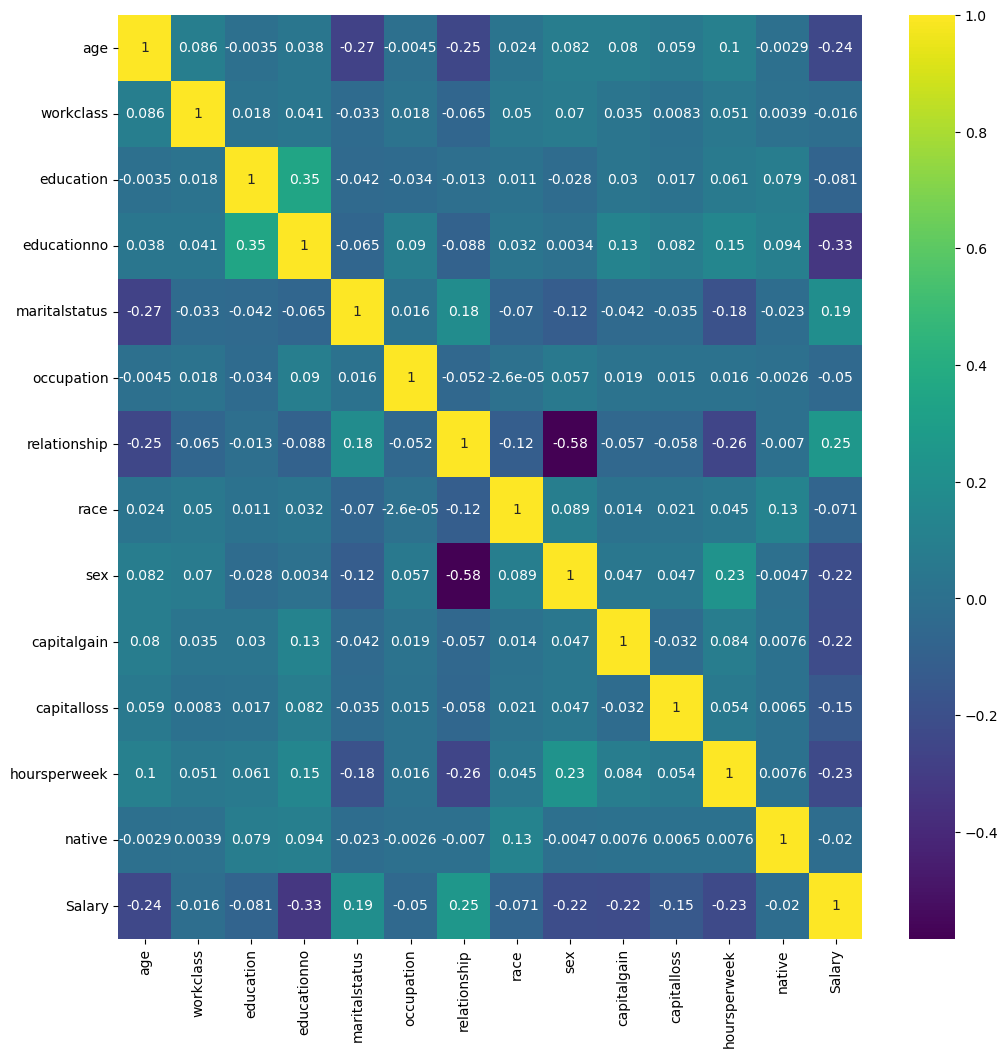

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="viridis")
plt.show()

Skewness=  -0.31062061074424
Kurtosis=  0.6350448194491634


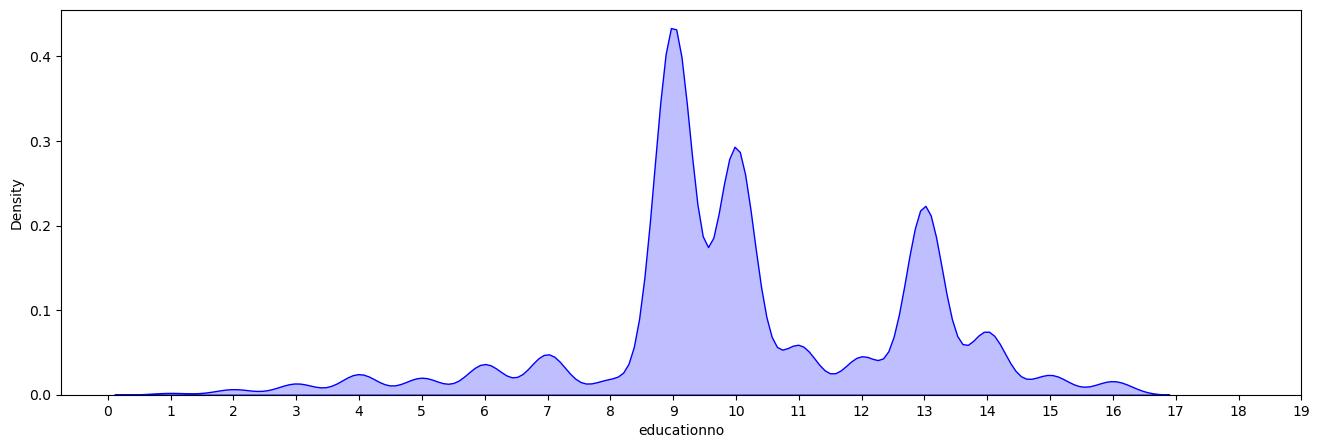

In [21]:
plt.figure(figsize=(16,5))
print("Skewness= ",df["educationno"].skew())
print("Kurtosis= ",df["educationno"].kurt())
sns.kdeplot(df["educationno"],fill=True,color="b")
plt.xticks([i for i in range(0,20)])
plt.show()

In [22]:
dfa = df[df.columns[0:13]]
column=dfa.columns.tolist()

In [23]:
column

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

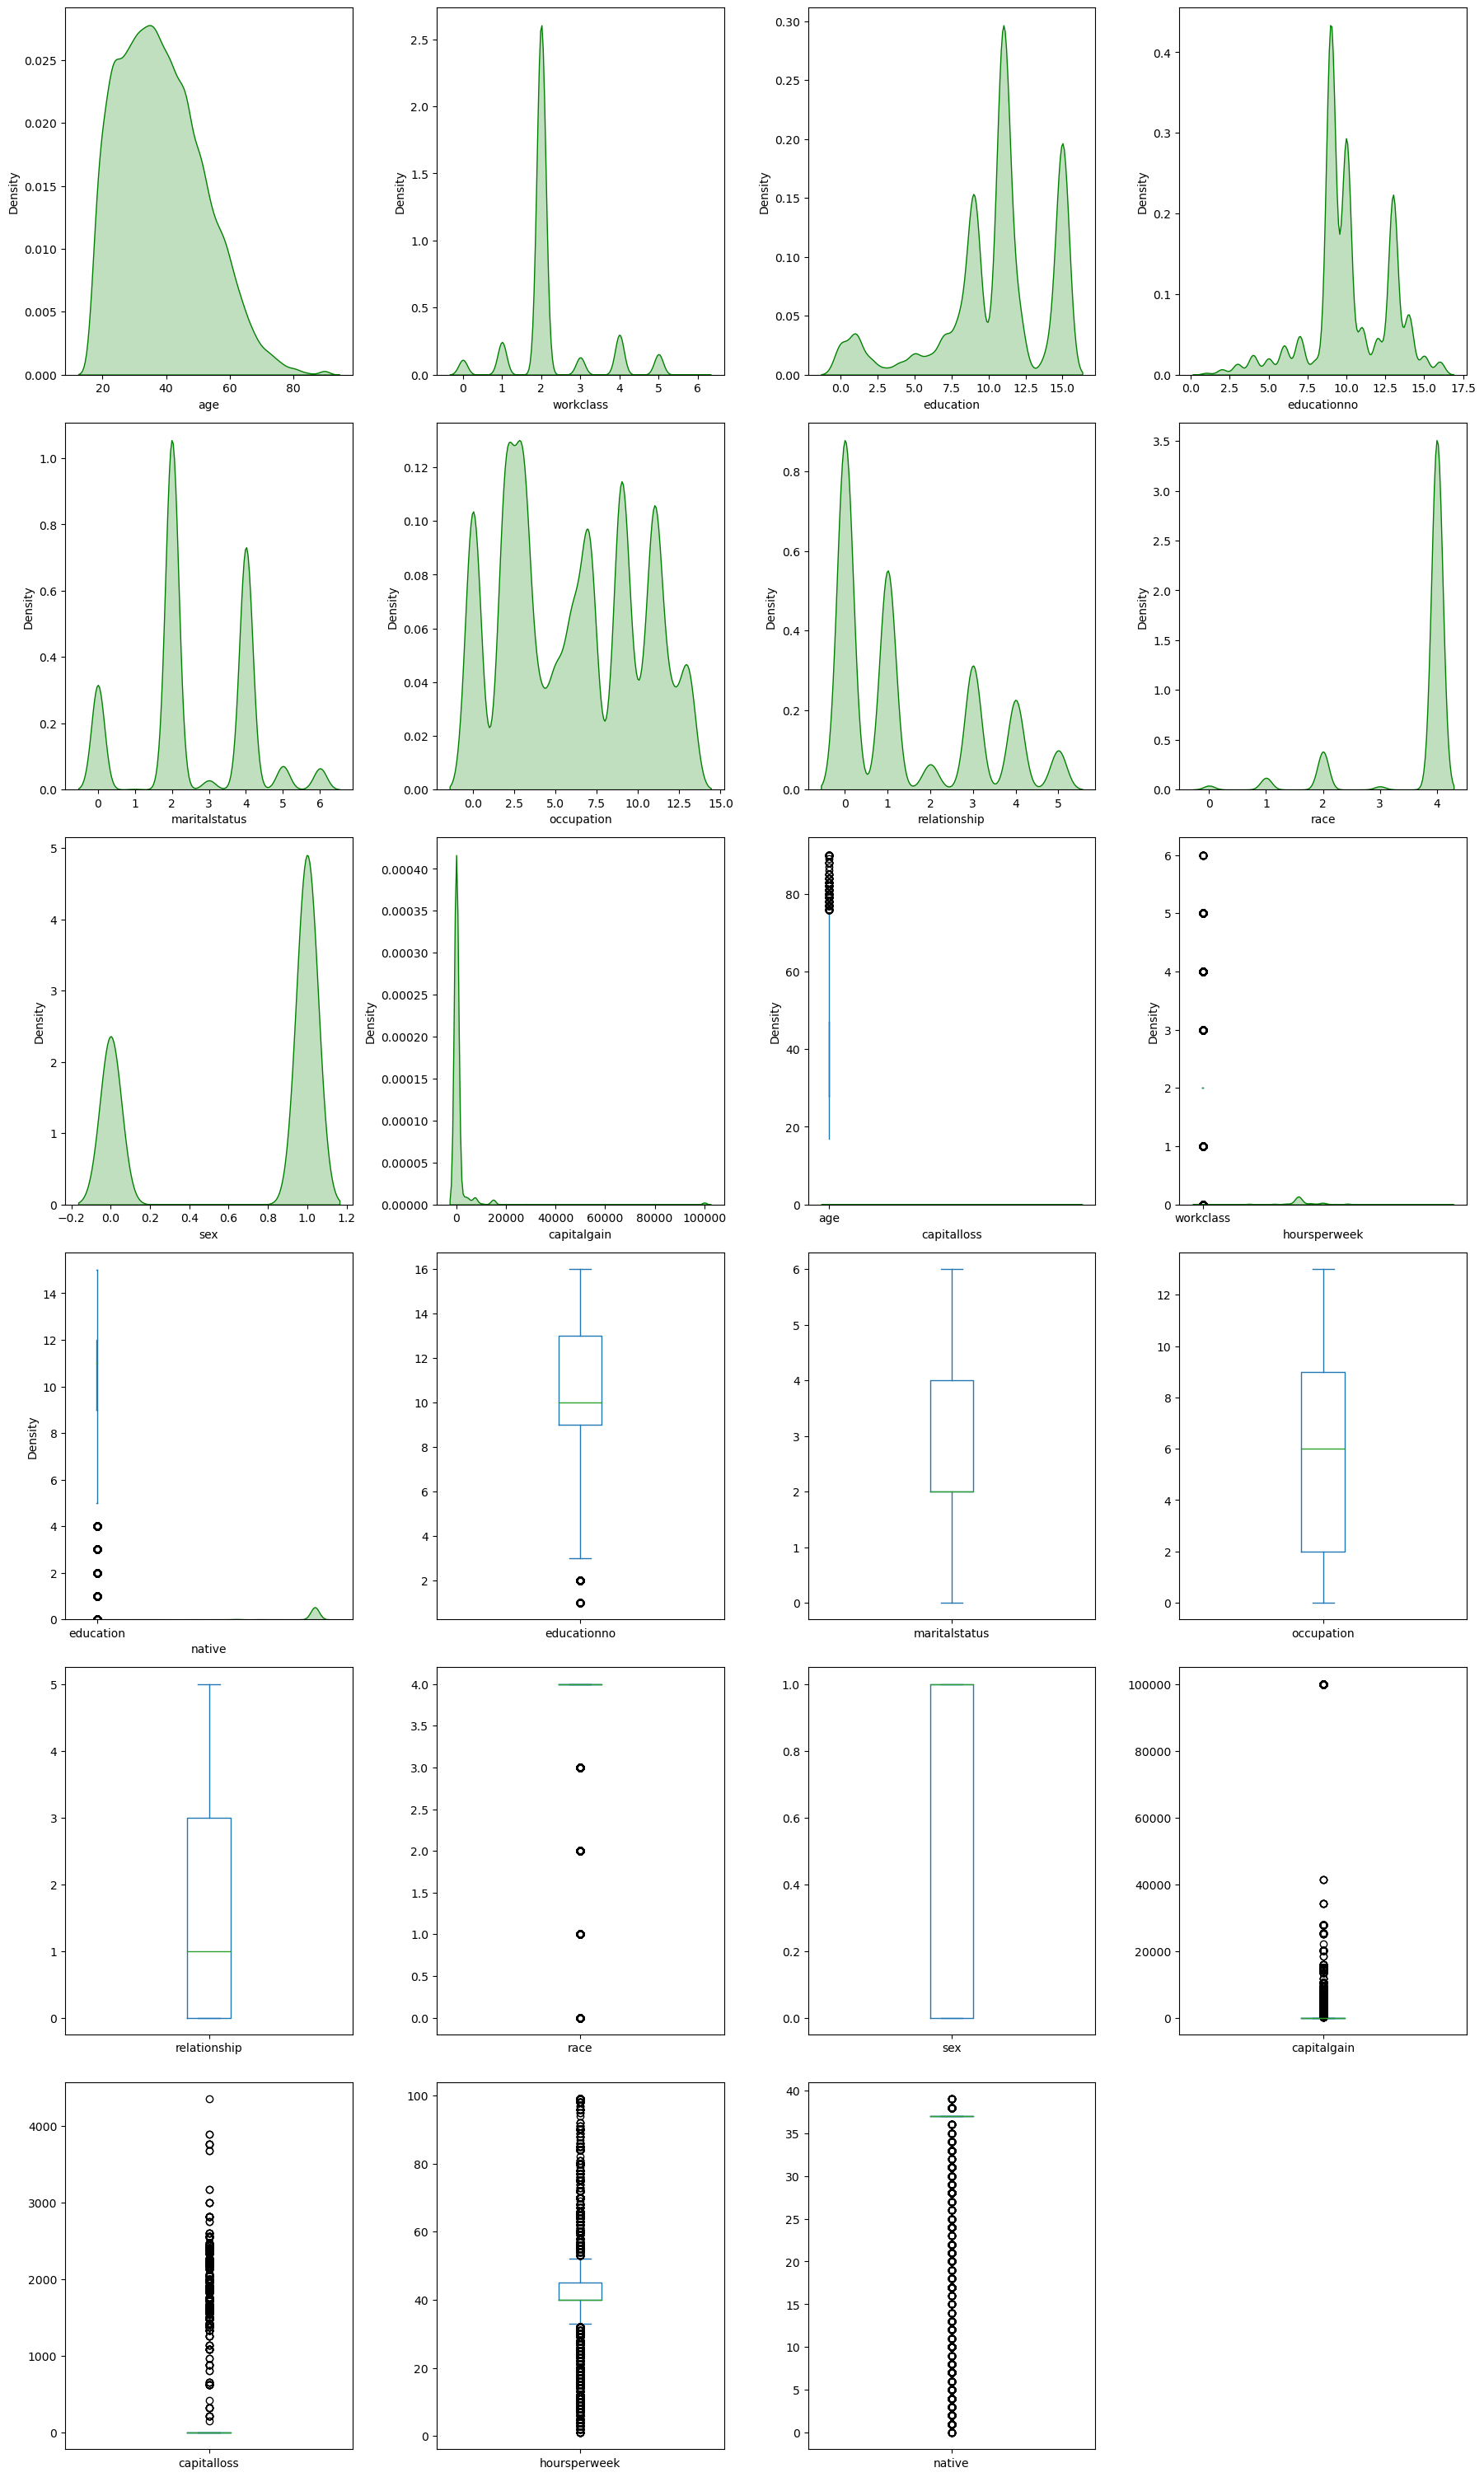

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
skewness,0.532784,1.148931,-0.945666,-0.310621,-0.006760,0.107141,0.829192,-2.518388,-0.747594,11.788871,4.517536,0.340536,-4.173813
kurtosis,-0.155931,2.329983,0.773506,0.635045,-0.538981,-1.249883,-0.697095,5.350390,-1.441168,150.147899,19.376085,3.201287,17.322823


In [24]:
plt.figure(figsize=(18,40))
for i,col in enumerate(column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',fill=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[column]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [25]:
x_test=test.iloc[:,:13]
x_train=train.iloc[:,:13]
y_test=test.iloc[:,13]
y_train=train.iloc[:,13]

### GaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
clsfrgnb=GaussianNB()

In [28]:
clsfrgnb.fit(x_train,y_train)

GaussianNB()

In [29]:
y_pred_gnb=clsfrgnb.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
confusion_matrix(y_test,y_pred_gnb)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred_gnb)

0.7946879150066402

In [33]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


### MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
clsfrmnb=MultinomialNB()

In [36]:
clsfrmnb.fit(x_train,y_train)

MultinomialNB()

In [37]:
y_pred_mnb=clsfrmnb.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_mnb)

0.7749667994687915

In [40]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [43]:
results = []
names = []
scoring = 'accuracy'

In [44]:

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.801864 (0.006406)
LDA: 0.810451 (0.003933)
KNN: 0.833295 (0.004665)
CART: 0.806903 (0.007576)
NB: 0.795498 (0.007394)


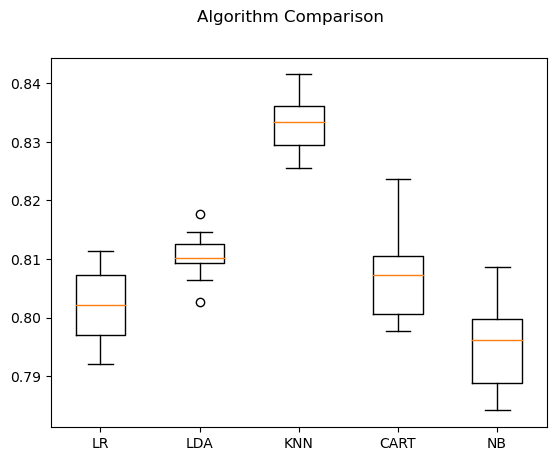

In [45]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()